In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
trainingData = pd.read_csv('MNIST_training.csv', skiprows=[0], header = None)
testingData = pd.read_csv('MNIST_test.csv', skiprows=[0], header=None)

In [47]:
def linearRegression(x, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(x.transpose(), x)), x.transpose()), y)

def predictClass(x, b, threshold):
    return np.array(np.dot(x, b) > threshold)

def accuracy(x, y):
    return ( sum(x == y) / float(len(y))) * 100

def cost(x, y, b):
    return np.sum((np.dot(x, b) - np.array(y)) **2)

def gradientDescent(x, y, b):
    return -np.dot(x.transpose(), y) + np.dot(np.dot(x.transpose(), x), b)

def min_max(x):
    return x / 255.0

In [48]:
trainLabels = trainingData.iloc[: ,0]
testLabels = testingData.iloc[:, 0]

trainData = trainingData.iloc[:, 1:]
testData = testingData.iloc[:, 1:]

In [49]:
bOpt = linearRegression(trainData, trainLabels)

print bOpt

predictions = predictClass(testData, bOpt, .5)


[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [50]:
print "Accuracy = %f%%" % accuracy(predictions, testLabels)

Accuracy = 98.000000%


In [51]:
_, p = trainData.shape
bEstimate = np.zeros(p)
learningRate = 1e-10
bs = [bEstimate]
costs = [cost(trainData, trainLabels, bEstimate)]
for i in range(0, 100):
    bEstimate = bEstimate - learningRate * gradientDescent(trainData, trainLabels, bEstimate)
    bCost = cost(trainData, trainLabels, bEstimate)
    bs.append(bEstimate)
    costs.append(bCost)

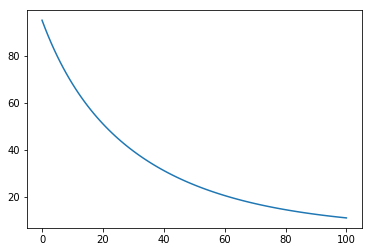

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [52]:
plt.plot(costs)
plt.show()
print bEstimate

In [53]:
gradientPred = predictClass(testData, bEstimate, 0.5)
print "Non-normalized gradient descent b estimate."
# print bEstimate

Non-normalized gradient descent b estimate.


In [54]:
print "Non-normalized accuracy : %f%%" % accuracy(gradientPred, testLabels)

Non-normalized accuracy : 97.500000%


In [56]:
xNormTrain = min_max(trainData)
xNormTest = min_max(trainLabels)
_, p = xNormTrain.shape
bEstimate = np.zeros(p)
learningRate = 1e-4
bs = [bEstimate]
costs = [cost(xNormTrain, trainLabels, bEstimate)]
for i in range(0, 100):
    bEstimate = bEstimate - learningRate * gradientDescent(xNormTrain, trainLabels, bEstimate)
    bCost = cost(xNormTrain, trainLabels, bEstimate)
    bs.append(bEstimate)
    costs.append(bCost)


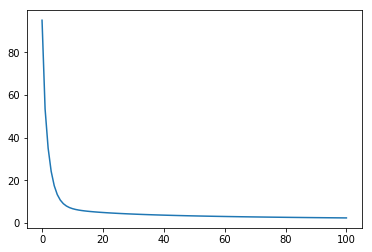

In [57]:
plt.plot(costs)
plt.show()

In [58]:
totalDifference = sum(abs(bOpt - bEstimate))
print totalDifference

2.7681761534
